In [1]:
from astropy.io import fits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = 10,6

In [2]:
# dat = fits.getdata('/home/spencerscott/classes/cosmo/final_proj/data/IN_PAPER/GGL003400-094434_1/GGL003400-0944.fits',ext=0)
dat = fits.open('/home/spencerscott/classes/cosmo/final_proj/data/IN_PAPER/GGL020928-100653_1/GGL020928-1007.fits')

In [3]:
fits.info('/home/spencerscott/classes/cosmo/final_proj/data/IN_PAPER/GGL020928-100653_1/GGL020928-1007.fits')

Filename: /home/spencerscott/classes/cosmo/final_proj/data/IN_PAPER/GGL020928-100653_1/GGL020928-1007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (38, 25)   float64   
  1                1 ImageHDU         7   (38, 25)   float64   
  2                1 ImageHDU         7   (38, 25)   float64   
  3                1 ImageHDU         7   (38, 25)   float64   
  4                1 ImageHDU         8   (4842, 38, 25)   float64   
  5                1 ImageHDU         8   (4842, 38, 25)   float64   
  6                1 ImageHDU         6   (4842,)   float64   
  7                1 ImageHDU         8   (4842, 38, 25)   float64   
  8                1 ImageHDU       243   (3326, 38, 25)   float64   
  9                1 ImageHDU         8   (3326, 38, 25)   float64   
 10                1 ImageHDU       243   (2842, 38, 25)   float64   
 11                1 ImageHDU         8   (2842, 38, 25)   float64   
 12                1 I

In [4]:
dat[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   38                                                  
NAXIS2  =                   25                                                  
EXTEND  =                    T                                                  
SYS_ID  = 'GGL020928-100653'   / systemid                                       
T_ID_S  = 'S020928-100654'     / targetid_source                                
RA_S    = '32.367435455322300' / ra_source                                      
DEC_S   = '-10.114879608154300' / dec_source                                    
Z_S     = '0.08569219708442690' / z_source                                      
HSID_S  = '536261  '           / hsid_source                                    
ZREF_S  = '4       '        

Is detla what the paper calls phi? 

No, it is what the paper calls delta...

In [5]:
im = dat[0].data

In [6]:
im.shape

(25, 38)

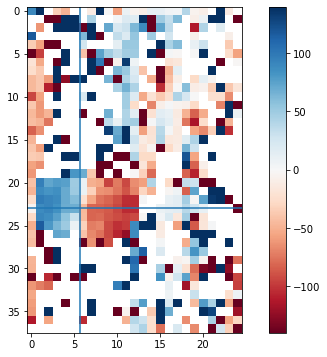

In [7]:
# im[im > 50] = np.nan
# plt.imshow(im.T[::-1],cmap='RdBu')
plt.imshow(im.T[::-1]-float(dat[0].header['V_SY']),cmap='RdBu',
           vmin=-float(dat[0].header['V_AS']), vmax=float(dat[0].header['V_AS']))
plt.axhline(float(dat[0].header['RAC']))
plt.axvline(float(dat[0].header['DECC']))
plt.colorbar()
plt.show()

In [8]:
#TODO: make sure angle units work

def R(theta):
    """R in eqn 8"""
    costh = np.cos(theta)
    sinth = np.sin(theta)
    return np.array([[costh, -sinth],[sinth, costh]])

def I(i):
    """I in eqn 8"""
    return np.array([[1,0],[0, np.sin(i)]])

def Aprime(gamma, delta):
    """A' in equation 9, with kappa set to 0 as per the last paragraph on that page"""
    twodelt = 2 * delta
    gamcos2delt = gamma * np.cos(twodelt) 
    gamsin2delt = gamma * np.sin(twodelt)
    return np.array([[1 - gamcos2delt, -gamsin2delt],[-gamsin2delt, 1 + gamcos2delt]])

def gal_V(x, y, vmax, v0, rt):
    """V(x,y) in galactocentric coordinates in eqn 6"""
    R = np.sqrt(x*x + y*y)
    omega = np.arctan(y / x)
    return 2 * vmax / np.pi * np.arctan(R / rt) * np.sin(omega) + v0



In [9]:
coords = np.zeros(im.shape)

In [18]:
x = dat[0].data[0]
y = dat[0].data[1]

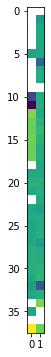

In [19]:
plt.imshow(np.array([x,y])[::-1].T)
plt.show()

In [72]:
x, y = np.array(np.meshgrid(range(25),range(38), indexing='xy'))

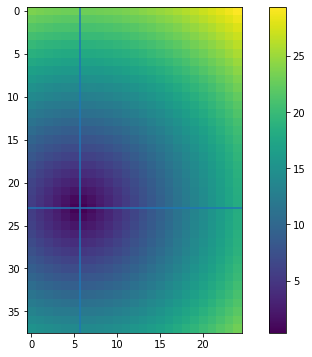

In [75]:
x0 = float(dat[0].header['DECC'])
y0 = float(dat[0].header['RAC'])
plt.imshow(np.sqrt((x-x0)*(x-x0) + (y-y0)*(y-y0)))
plt.axhline(y0)
plt.axvline(x0)
plt.colorbar()
plt.show()